# SVM


In [1]:
import numpy as np
import random,math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 1

## First Dataset: linearly-separable and non-overlapping case

## 1.1 Linear Kernel

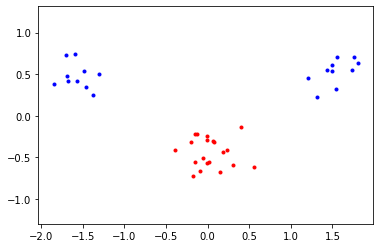

In [56]:
np.random.seed(1027)

### Structuring Data 

classA1 = np.concatenate((np.random.randn(10,2)*0.2+[1.5,0.5],np.random.randn(10,2)*0.2+[-1.5,0.5]))
#classA1 = np.random.randn(20,2)*0.2+[1.5,0.5]
classB1 = np.random.randn(20,2)*0.2+[0.0,-0.5]

inputs1 = np.concatenate((classA1,classB1))
targets1 = np.concatenate((np.ones(classA1.shape[0]),-np.ones(classB1.shape[0])))

N1 = inputs1.shape[0]

permute1 = list(range(N1))
random.shuffle(permute1)
inputs1 = inputs1[permute1,:]
targets1 = targets1[permute1]

### Plot data1

plt.plot([p[0]for p in classA1],[p[1] for p in classA1],'b.')
plt.plot([p[0] for p in classB1],[p[1] for p in classB1],'r.')
plt.axis('equal') 
#plt.savefig('traindata.pdf') 
plt.show() 

### Kernels

In [68]:
### Kernel functions

def Poly_Kernel(x_vec,y_vec,p=2):
    return (np.dot(x_vec,y_vec)+1)**p

def RBF_Kernel(x_vec,y_vec,σ=1): 
    return np.exp(-np.dot(x_vec-y_vec,x_vec-y_vec)/2*(σ**2))

def Linear_Kernel(x_vec,y_vec): 
    return np.dot(x_vec,y_vec)
def Selected_Kernel(x_vec,y_vec): 
    return Linear_Kernel(x_vec,y_vec) #change the selected kernel here

### Setting Parameters (DATASET 1)

In [69]:
### For callable functions
α_ini = np.zeros((1,N1))
τ = targets1
K = np.zeros((N1,N1))
P = np.zeros((N1,N1)) 
for i in range(0,N1):
    for j in range(0,N1):
        χ = inputs1[i,:]
        γ = inputs1[j,:]
        K[i,j] = Selected_Kernel(χ,γ)
        P[i,j] = τ[i]*τ[j]*Selected_Kernel(χ,γ)
        
### For callable constraints
C = None # slack variable constant
B = [(0,C) for b in range(N1)] # Bound

### Objective

In [70]:
### Objective function and zerofun

"""
def Objective(a):
    obj = 0.5*np.matmul(np.matmul(a,P),a.T) - np.sum(a) 
    #obj = 0.5*np.dot(a,np.dot(P,a)) - np.sum(a) 
    return obj
"""
def Objective(a):
    obj=0
    for i in range(0,P.shape[0]):
        for j in range(0,P.shape[0]):
            obj += a[i]*a[j]*P[i,j]
    
    return obj/2 - np.sum(a) 
### Equality constraint (10)
def zerofun(a):
    return np.dot(a,τ)

### Minimize function

In [72]:
# Minimize

ret = minimize(Objective,α_ini,bounds=B,constraints={'type':'eq','fun':zerofun})
α_new = ret.x
α_new

array([8.94096835e-16, 8.48538622e-17, 0.00000000e+00, 0.00000000e+00,
       1.25458375e-14, 2.98222010e-15, 0.00000000e+00, 7.41693884e-15,
       0.00000000e+00, 2.07240460e-14, 1.34955752e-14, 4.93305240e-15,
       0.00000000e+00, 2.57150233e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.62006069e-14, 0.00000000e+00, 2.90271657e-15,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.51904603e-15, 0.00000000e+00, 4.94113727e+00, 0.00000000e+00,
       8.67394546e-16, 0.00000000e+00, 0.00000000e+00, 9.73380438e+00,
       1.46749416e+01, 2.72594630e-14, 0.00000000e+00, 5.58144433e-15,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

### Extracting Non-zero alphas

In [73]:
## Extract the non-zero alpha-values

thres = 1e-05
α = (α_new>=thres)*α_new
α

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  4.94113727,  0.        ,  0.        ,  0.        ,
        0.        ,  9.73380438, 14.67494164,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

### Compute b (bias)

In [74]:

### PROBLEM HERE!!! ###

## Calculate b value
s_index = np.nonzero(α)
s_inputs = inputs1[s_index]

"""b = 0
for i in s_index[0]:
    b += α[i]*τ[i]*Linear_Kernel(s_inputs[1],inputs1[i,:]) - τ[s_index[0][1]]"""

#b = np.dot(1*(α != 0),(np.dot(α*τ,K) - τ))
for i in range(0,α.shape[0]):
    b[i] = np.dot(α*τ, K[i,:]) - τ[i]
b

array([-0.18425062,  2.01728664, -2.64410118,  2.90746876, -0.64181962,
       -0.7232771 ,  1.51290082, -0.70043247,  1.84153224,  0.79206277,
       -0.56896582,  1.4993124 ,  2.93981307,  2.06605286, -2.04321045,
        2.5151172 ,  2.91715313,  0.81670767, -2.90934458,  0.99929133,
       -2.02319791,  1.16906313,  2.85283173, -1.3308819 ,  2.02864915,
       -1.19137418,  0.31859788, -1.77068023, -1.24836322, -2.30930805,
       -2.62504677,  0.31860035,  0.31859938, -0.31347435, -2.21913701,
       -0.2000322 ,  1.19256355, -2.01390185,  1.65825076,  2.3904999 ])

### Compute Indicator function

In [75]:
## Indicator fucntion
s_index = np.nonzero(α)
s_inputs = inputs1[s_index]

def Indicator(x,y):
    indic = 0
    for i in s_index[0]:
        indic += α[i]*τ[i]*Selected_Kernel([x,y],inputs1[i,:]) 
    indic -= b[i]
    return indic

### Kernel Classification Plot

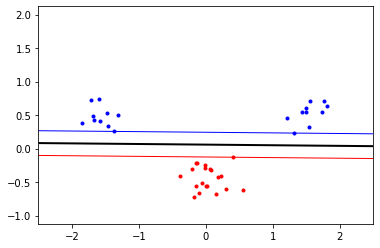

In [76]:
#### PLOTS

plt.plot([p[0]for p in classA1],[p[1] for p in classA1],'b.')
plt.plot([p[0]for p in classB1],[p[1] for p in classB1],'r.')
plt.axis('equal') 

xgrid = np.linspace(-2.5,2.5)
ygrid = np.linspace(-1,2.0)
grid = np.array([[Indicator(x,y) for x in xgrid] for y in ygrid])
plt.contour(xgrid,ygrid,grid,(-1.0,0.0,1.0),colors=('red','black','blue'),linewidths=(1,2,1))

#plt.savefig('svmplot.pdf') 
plt.show() 